# Data Challenge Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
from scipy import stats

## Data Cleanup

In [2]:
# Uploaded dataframe containing socioeconomic, temperature, and building parameters
data = pd.read_csv("/LV_ej_temp/LV_EJ_Temp.txt")

In [3]:
# Derived building age from year built
list1 = data["Res_Year"]
for i in range(1232):
    if list1[i] == 0:
        list1[i] = 2021

data["RYear"] = list1
data["Res_Age"] = 2021 - data["RYear"]

list2 = data["Com_Year"]
for i in range(1232):
    if list2[i] == 0:
        list2[i] = 2021

data["CYear"] = list2
data["Com_Age"] = 2021 - data["CYear"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [4]:
# Removed parameters that were not used
data = data.drop(columns=['ACSTOTPOP', 'ACSIPOVBAS', 'ACSEDUCBAS',
                   'ACSTOTHH', 'ACSTOTHU', 'MINORPOP','LOWINCOME',
                   'LESSHS', 'LINGISO', 'LINGISOPCT', 'UNDER5',
                   'UNDER5PCT', 'OVER64', 'PRE1960', 'PRE1960PCT',
                   'VULEO', 'DISPEO', 'DSLPM', 'area',
                   'BuildCnt', 'Res_Den', 'Com_Den', 'Res_Year', 'RYear', 'Com_Year', 'CYear'])

In [5]:
# Removed all outliers and null values
dffinal = data.drop(columns=['FID', 'OBJECTID', 'ID'])

for column in list(dffinal.columns):
    val = list(dffinal[column].sort_values().tail(5))[2]
    collist1 = dffinal[(dffinal[column] < val)][column]
    dffinal[column] = collist1
    
    val = list(dffinal[column].sort_values().tail(5))[2]
    collist2 = dffinal[(dffinal[column] != 0)][column]
    dffinal[column] = collist2
    
dffinal = dffinal.dropna()

## Challenge 1 - Distribution of building types and their correlation with building characteristics

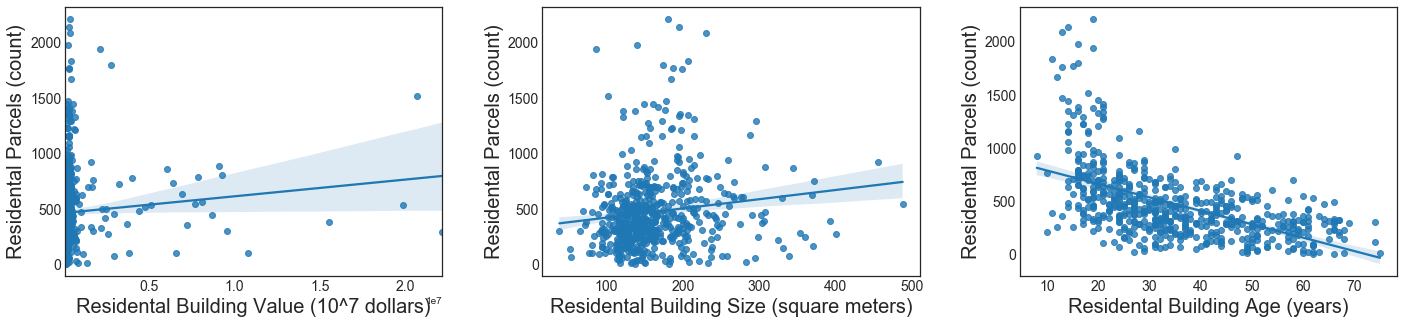

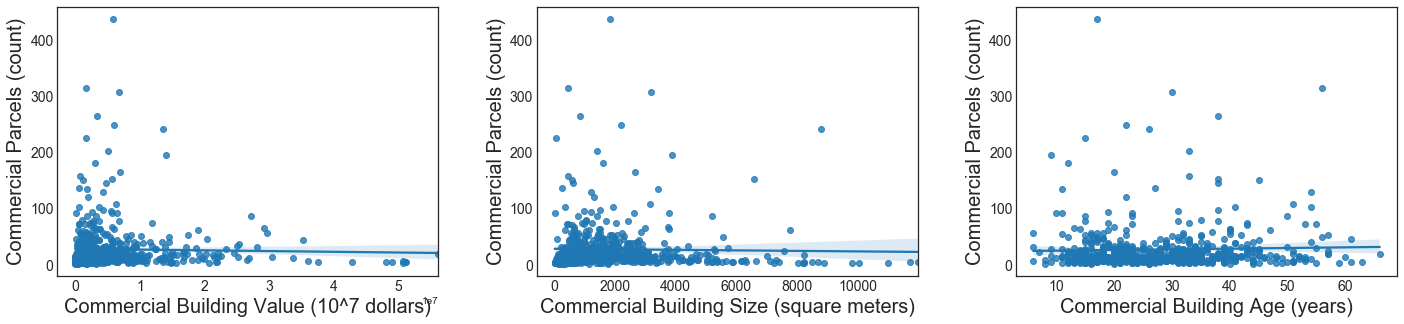

In [6]:
# Correlations for residential buildings
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
list1 = ["Value", "Size", "Age"]
list2 = [ax1, ax2, ax3]
list3 = ["(10^7 dollars)", "(square meters)", "(years)"]
for i in range(3):
    
    val = list(dffinal["Res_"+list1[i]].sort_values().tail(5))[2]
    dfplot = dffinal[(dffinal["Res_"+list1[i]] < val) & (dffinal["Res_"+list1[i]] != 0) & (dffinal["Res_Parcel"] < 3000) & (dffinal["Res_Parcel"] != 0)]

    sns.regplot(y=dffinal["Res_Parcel"], x=dffinal["Res_"+list1[i]], ax=list2[i])
    list2[i].tick_params(labelsize=14)
    list2[i].set_xlabel("Residental Building "+list1[i]+" "+list3[i], fontsize=20)
    list2[i].set_ylabel("Residental Parcels (count)", fontsize=20)
fig.tight_layout(pad=2.5)

# Correlations for commercial buildings
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
list1 = ["Value", "Size", "Age"]
list2 = [ax1, ax2, ax3]
list3 = ["(10^7 dollars)", "(square meters)", "(years)"]
for i in range(3):
    
    val = list(dffinal["Com_"+list1[i]].sort_values().tail(5))[2]
    dfplot = dffinal[(dffinal["Com_"+list1[i]] < val) & (dffinal["Com_"+list1[i]] != 0) & (dffinal["Com_Parcel"] < 500) & (dffinal["Com_Parcel"] != 0)]
    
    sns.regplot(y=dfplot["Com_Parcel"], x=dfplot["Com_"+list1[i]], ax=list2[i])
    list2[i].tick_params(labelsize=14)
    list2[i].set_xlabel("Commercial Building "+list1[i]+" "+list3[i], fontsize=20)
    list2[i].set_ylabel("Commercial Parcels (count)", fontsize=20)
fig.tight_layout(pad=2.5)

## Challenge 3 - Correlation between socio-economic and demographic characteristics and the built environment

In [7]:
# Correlated all factors against each other and determined the R and P values for each correlatio
plist = []
rlist = []
metric1 = []
metric2 = []

for x in ['MINORPCT', 'LOWINCPCT', 'LESSHSPCT', 'OVER64PCT', 'VULEOPCT',
          'Tmax_day', 'lst_july', 'diff', 'Res_Parcel', 'Res_Value', 'Res_Size',
          'Com_Parcel', 'Com_Value', 'Com_Size', 'Cnt_Dens', 'HU_Den', 'Res_Age','Com_Age']:
    for y in ['MINORPCT', 'LOWINCPCT', 'LESSHSPCT', 'OVER64PCT', 'VULEOPCT',
          'Tmax_day', 'lst_july', 'diff', 'Res_Parcel', 'Res_Value', 'Res_Size',
          'Com_Parcel', 'Com_Value', 'Com_Size', 'Cnt_Dens', 'HU_Den', 'Res_Age','Com_Age']:
        list3 = list(stats.pearsonr(dffinal[x], dffinal[y]))
        rlist.append(list3[0])
        plist.append(list3[1])
        metric1.append(x)
        metric2.append(y)
        
statistics = pd.DataFrame()
statistics["Metric1"] = metric1
statistics["Metric2"] = metric2
statistics["R"] = rlist
statistics["P"] = plist

# Removed all correlations with P values less than .05
significant = statistics.loc[statistics["P"] < .05]

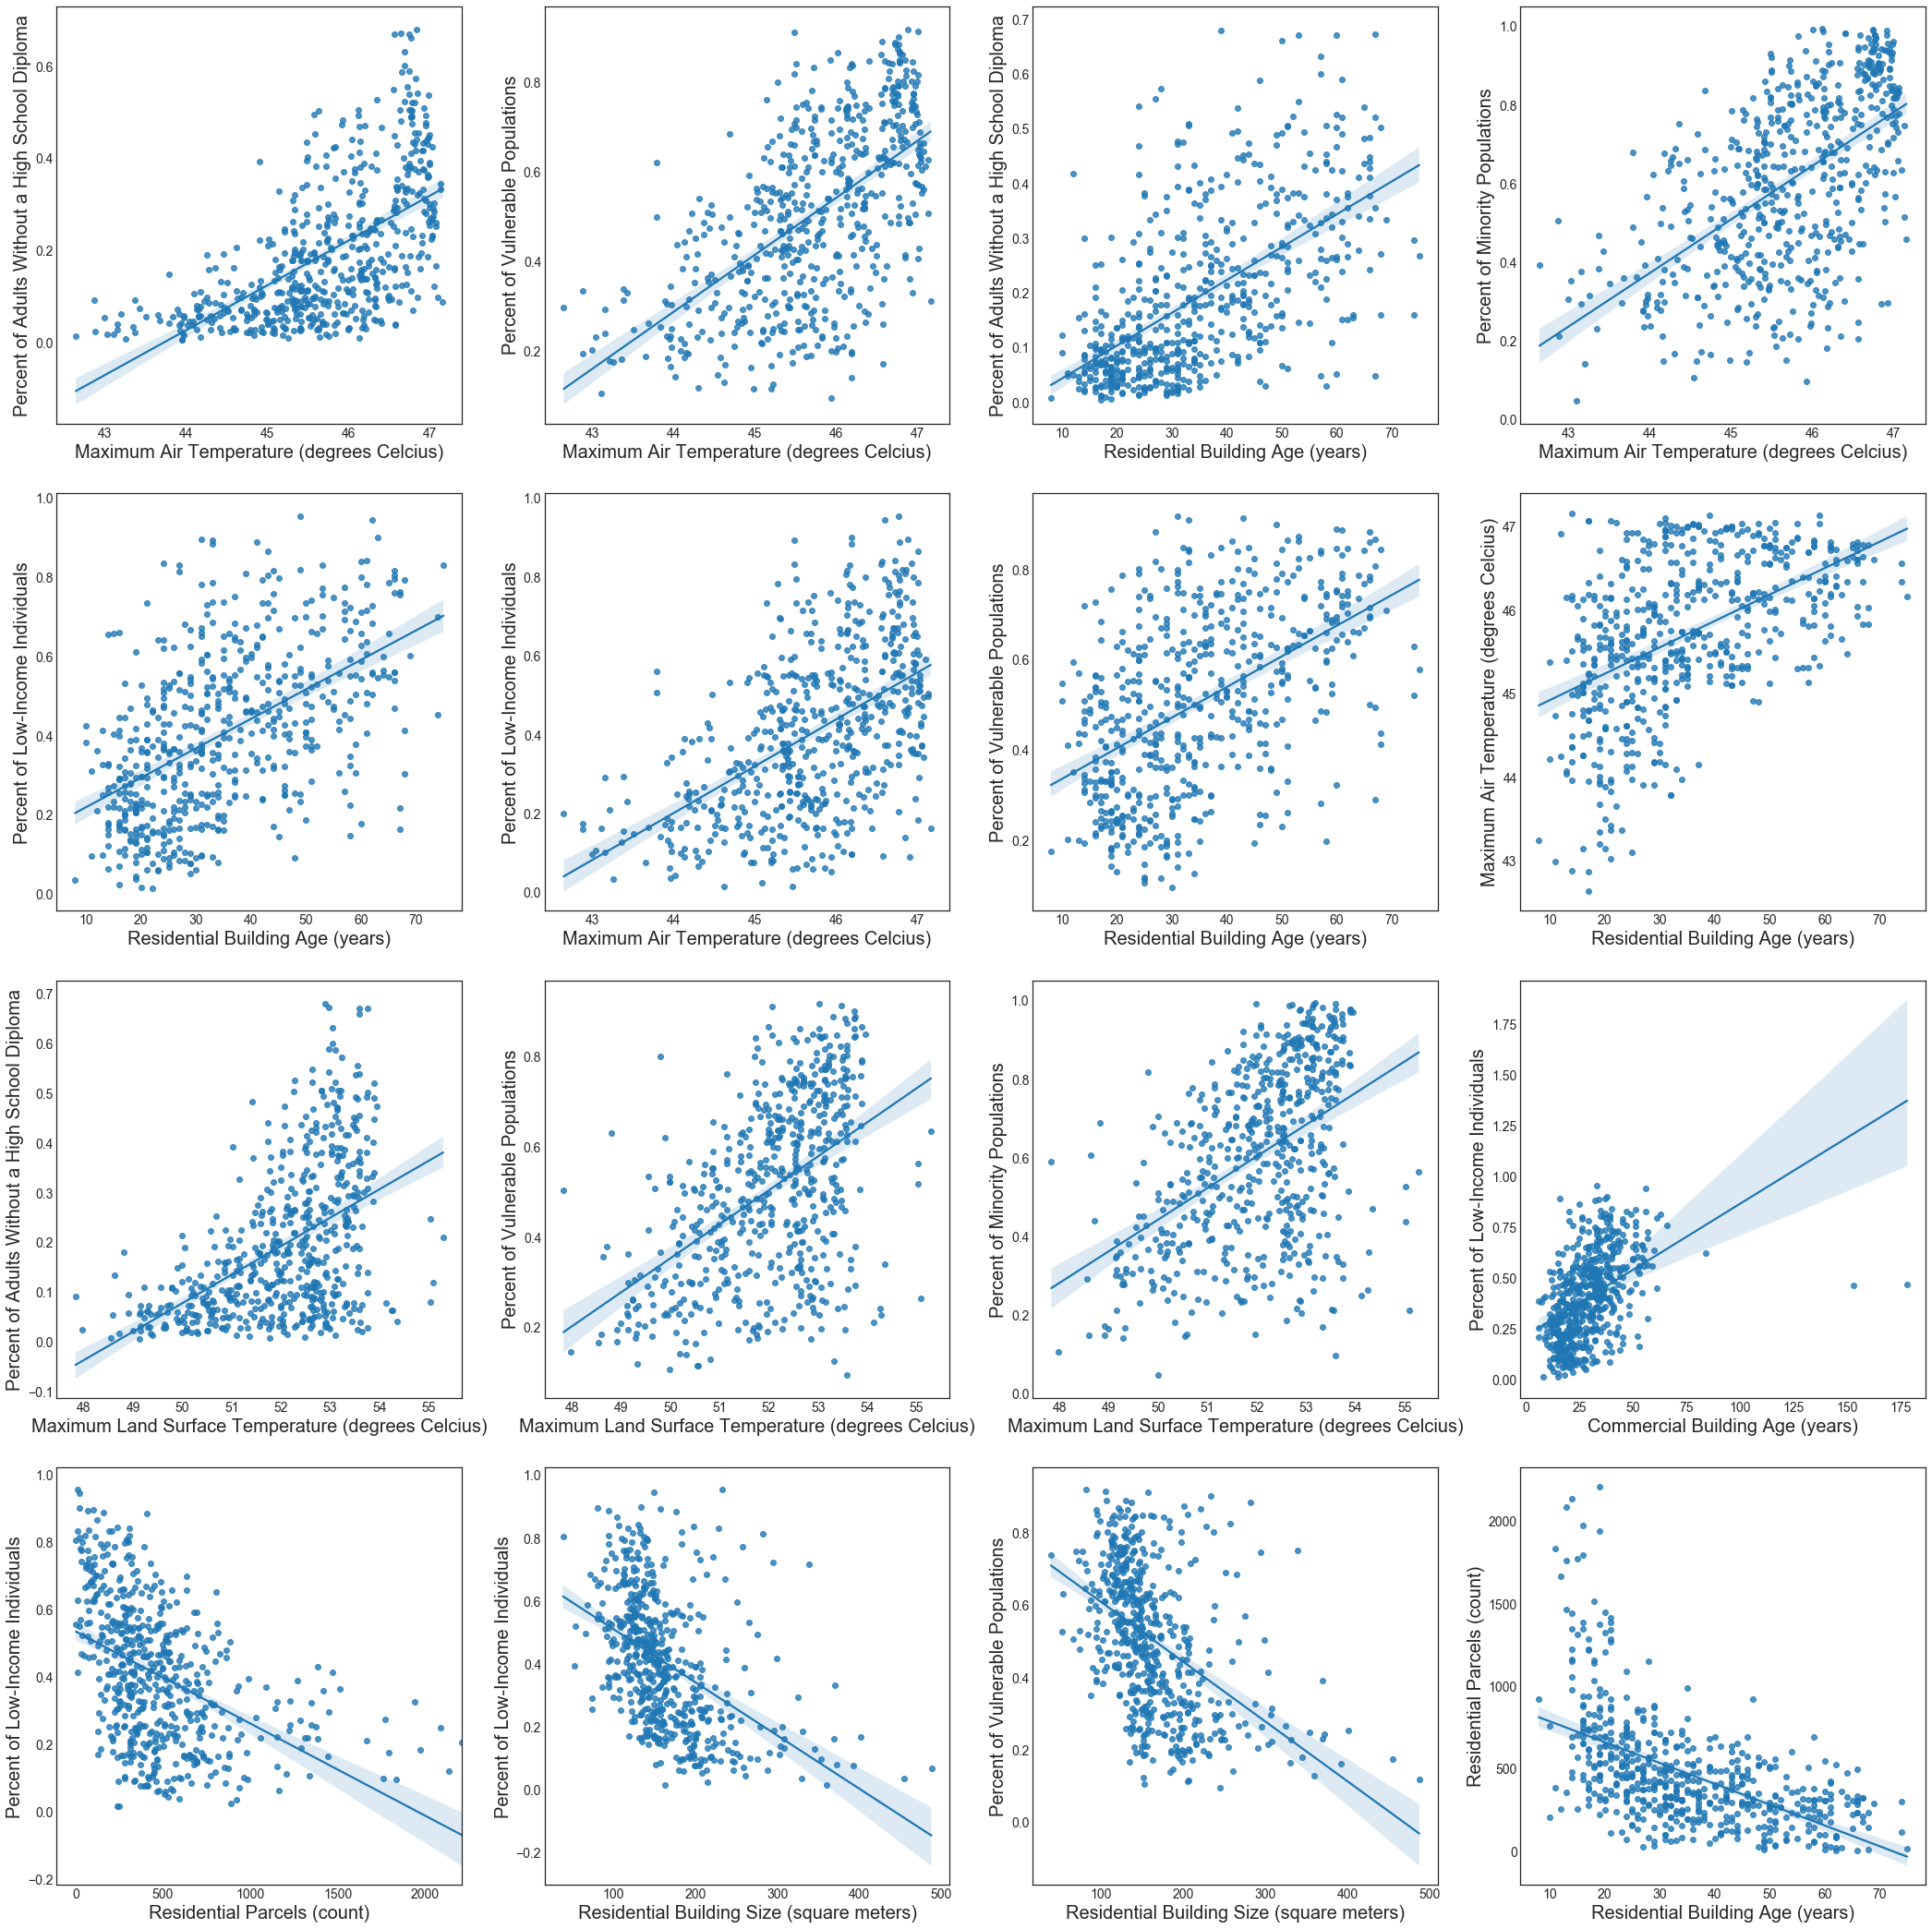

In [8]:
# Manually determined singificant correlations with R value < -.45 or > .45 and plotted them
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(30, 30))

list1 = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]
list2 = ["Percent of Adults Without a High School Diploma", "Percent of Vulnerable Populations",
         "Percent of Adults Without a High School Diploma", "Percent of Minority Populations",
         "Percent of Low-Income Individuals", "Percent of Low-Income Individuals",
         "Percent of Vulnerable Populations", "Maximum Air Temperature (degrees Celcius)",
         "Percent of Adults Without a High School Diploma", "Percent of Vulnerable Populations", 
         "Percent of Minority Populations", "Percent of Low-Income Individuals", 
         "Percent of Low-Income Individuals", "Percent of Low-Income Individuals",
         "Percent of Vulnerable Populations", "Residential Parcels (count)"]

list3 = ["Maximum Air Temperature (degrees Celcius)", "Maximum Air Temperature (degrees Celcius)", "Residential Building Age (years)",
         "Maximum Air Temperature (degrees Celcius)", "Residential Building Age (years)", "Maximum Air Temperature (degrees Celcius)",
         "Residential Building Age (years)", "Residential Building Age (years)", "Maximum Land Surface Temperature (degrees Celcius)",
         "Maximum Land Surface Temperature (degrees Celcius)", "Maximum Land Surface Temperature (degrees Celcius)", "Commercial Building Age (years)",
         "Residential Parcels (count)", "Residential Building Size (square meters)", "Residential Building Size (square meters)",
         "Residential Building Age (years)"]

list4 = ["LESSHSPCT", "VULEOPCT", "LESSHSPCT", "MINORPCT", "LOWINCPCT", "LOWINCPCT", "VULEOPCT", "Tmax_day", "LESSHSPCT", "VULEOPCT", "MINORPCT", "LOWINCPCT", 
         "LOWINCPCT", "LOWINCPCT", "VULEOPCT", "Res_Parcel"]

list5 = ["Tmax_day", "Tmax_day", "Res_Age", "Tmax_day",
        "Res_Age", "Tmax_day", "Res_Age", "Res_Age",
        "lst_july", "lst_july", "lst_july", "Com_Age",
        "Res_Parcel", "Res_Size", "Res_Size", "Res_Age"]

for i in range(16):
    sns.regplot(y=dffinal[list4[i]], x=dffinal[list5[i]], ax=list1[i])

fig.tight_layout(pad=5)


for i in range(16):
    list1[i].tick_params(labelsize=14)
    list1[i].set_ylabel(list2[i], fontsize=20, wrap=True)
    list1[i].set_xlabel(list3[i], fontsize=20, wrap=True)